<a href="https://colab.research.google.com/github/daniyah-rehman/MachineLearningTutorial/blob/main/Multi_SVM_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["KAGGLE_USERNAME"] ="daniyah1209865"
os.environ["KAGGLE_KEY"] = "25260e7b006aef622406bd3670e091ee"
!kaggle datasets download prasunroy/natural-images

 94% 322M/342M [00:02<00:00, 124MB/s]
100% 342M/342M [00:02<00:00, 138MB/s]


In [2]:
from IPython.display import clear_output
!unzip natural-images.zip
clear_output()

In [3]:
import shutil
from sklearn.model_selection import train_test_split
import random

In [4]:
# Set the path to the root folder
root_folder = "/content/natural_images"

# List all subfolders (categories) in the root folder
categories = os.listdir(root_folder)
print(categories)
train_folder = "/content/train"
test_folder = "/content/test"

# Initialize dictionaries to hold training and testing data
train_data = {}
test_data = {}
train_ratio = 0.8

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Loop through each category
for category in categories:
    if(category == "data"):
            continue
    category_folder = os.path.join(root_folder, category)
    print(category_folder)
    images = os.listdir(category_folder)
    print(images)

    # Split images into training and testing sets
    if len(images) >= 2:  # Ensure at least 2 images per category
        train_images, test_images = train_test_split(images, test_size=(1 - train_ratio), random_state=42)

        # Create subdirectories for the current category in train and test folders
        category_train_folder = os.path.join(train_folder, category)
        category_test_folder = os.path.join(test_folder, category)

        os.makedirs(category_train_folder, exist_ok=True)
        os.makedirs(category_test_folder, exist_ok=True)

        # Move training images to the train folder
        for image in train_images:
            src_path = os.path.join(category_folder, image)
            dest_path = os.path.join(category_train_folder, image)
            shutil.copy(src_path, dest_path)

        # Move testing images to the test folder
        for image in test_images:
            src_path = os.path.join(category_folder, image)
            dest_path = os.path.join(category_test_folder, image)
            shutil.copy(src_path, dest_path)

print("Data division complete.")

['person', 'flower', 'airplane', 'motorbike', 'cat', 'dog', 'car', 'fruit']
/content/natural_images/person
['person_0872.jpg', 'person_0418.jpg', 'person_0557.jpg', 'person_0904.jpg', 'person_0560.jpg', 'person_0539.jpg', 'person_0107.jpg', 'person_0841.jpg', 'person_0014.jpg', 'person_0880.jpg', 'person_0433.jpg', 'person_0355.jpg', 'person_0740.jpg', 'person_0545.jpg', 'person_0136.jpg', 'person_0143.jpg', 'person_0576.jpg', 'person_0756.jpg', 'person_0798.jpg', 'person_0771.jpg', 'person_0924.jpg', 'person_0624.jpg', 'person_0367.jpg', 'person_0851.jpg', 'person_0955.jpg', 'person_0180.jpg', 'person_0735.jpg', 'person_0197.jpg', 'person_0495.jpg', 'person_0435.jpg', 'person_0415.jpg', 'person_0605.jpg', 'person_0818.jpg', 'person_0669.jpg', 'person_0502.jpg', 'person_0069.jpg', 'person_0774.jpg', 'person_0363.jpg', 'person_0930.jpg', 'person_0246.jpg', 'person_0024.jpg', 'person_0324.jpg', 'person_0416.jpg', 'person_0013.jpg', 'person_0265.jpg', 'person_0401.jpg', 'person_0844.jpg',

Found 5516 images belonging to 8 classes.
Found 1383 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                      

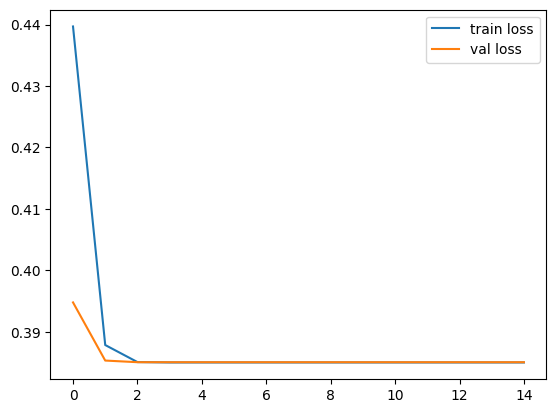

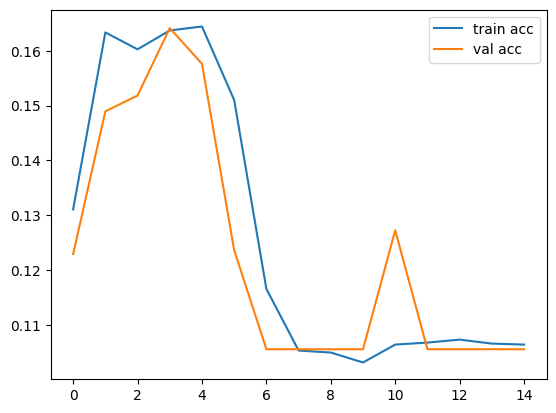

In [5]:
#importing the Usefull Modules
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

#Preprocessing the training Data using ImageDataGenerator
#One of the methods to prevent overfitting is to have more data. By this, our model will be exposed to more aspects of data and thus will #generalize better. To get more data, either you manually collect data or generate data from the existing data by applying some #transformations. The latter method is known as Data Augmentation.
#rescale: rescaling factor. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided.
#shear_range: This is the shear angle in the counter-clockwise direction in degrees.
#zoom_range: This zooms the image.
#horizontal_flip: Randomly flips the input image in the horizontal direction.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/train",
        target_size=(64, 64),
        batch_size=32,
        class_mode="sparse"
      )

#Preprocessing the test Data using ImageDataGenerator
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/test",
        target_size=(64, 64),
        batch_size=32,
        class_mode="sparse"
      )


# Creating the Model
# Importing useful models for CNN Layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
#When to use a Sequential model
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

#A Sequential model is not appropriate when:

#Your model has multiple inputs or multiple outputs
#Any of your layers has multiple inputs or multiple outputs
#You need to do layer sharing
#You want non-linear topology (e.g. a residual connection, a multi-branch model)
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
# This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

# When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(64, 64, 3) for 64x64 RGB pictures in data_format="channels_last". You can use None when a dimension has variable size.

# Arguments Used:

# filters: Integer, the dimensionality of the output space.
# padding: one of "valid" or "same". "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
# kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
# activation: Activation function to use. If you don't specify anything, no activation is applied.
# strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
# Step 2 - Pooling
# Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
# Flattens the input. Does not affect the batch size.

# Note: If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

cnn.add(tf.keras.layers.Flatten())
# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Step 5 - Output Layer
cnn.add(Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
#Printing out the summary of the Layers
cnn.summary()

# Training the CNN
# Compiling the CNN
# Attributes:
# optimizer: String (name of optimizer) or optimizer instance.
# loss: Loss function.
# metrics: List of metrics to be evaluated by the model during training and testing.
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
# Training the CNN on the Training set and evaluating it on the Test set
# Attributes:
# x: Input data
# validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
# epochs: Integer. Number of epochs to train the model.
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)
# Ploting the Train loss,val loss and train acc, val acc
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


# Saving the trained model
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')


In [6]:
training_set = datagen.flow_from_directory(
        "/content/train",
        target_size=(64, 64),
        batch_size=32,
        class_mode="categorical"
      )

#Preprocessing the test Data using ImageDataGenerator
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/test",
        target_size=(64, 64),
        batch_size=32,
        class_mode="categorical"
      )

Found 5516 images belonging to 8 classes.
Found 1383 images belonging to 8 classes.


In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the model
cnn = Sequential()

# Convolutional layers
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
cnn.add(MaxPool2D(pool_size=2))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2))

# Flatten layer
cnn.add(Flatten())

# Fully connected layers
cnn.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)))
cnn.add(Dropout(0.5))  # Adding dropout to prevent overfitting

# Output layer
cnn.add(Dense(8, activation='softmax'))

# Compile the model
cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the CNN
history = cnn.fit(training_set, validation_data=test_set, epochs=20)

# ... (Plotting the training and validation curves)

# Save the trained model
cnn.save('./model_cats_dogs.h5')

Epoch 1/20
173/173 [==============================] - 47s 269ms/step - loss: 1.6524 - accuracy: 0.5625 - val_loss: 1.1639 - val_accuracy: 0.7281
Epoch 2/20
173/173 [==============================] - 46s 268ms/step - loss: 1.0224 - accuracy: 0.7493 - val_loss: 0.8329 - val_accuracy: 0.8019
Epoch 3/20
173/173 [==============================] - 45s 262ms/step - loss: 0.9232 - accuracy: 0.7732 - val_loss: 0.7545 - val_accuracy: 0.8380
Epoch 4/20
173/173 [==============================] - 46s 268ms/step - loss: 0.8526 - accuracy: 0.8000 - val_loss: 0.6772 - val_accuracy: 0.8633
Epoch 5/20
173/173 [==============================] - 48s 277ms/step - loss: 0.8255 - accuracy: 0.8120 - val_loss: 0.7497 - val_accuracy: 0.8380
Epoch 6/20
173/173 [==============================] - 44s 254ms/step - loss: 0.8113 - accuracy: 0.8145 - val_loss: 0.6905 - val_accuracy: 0.8532
Epoch 7/20
173/173 [==============================] - 45s 258ms/step - loss: 0.7710 - accuracy: 0.8247 - val_loss: 0.6598 - val_ac

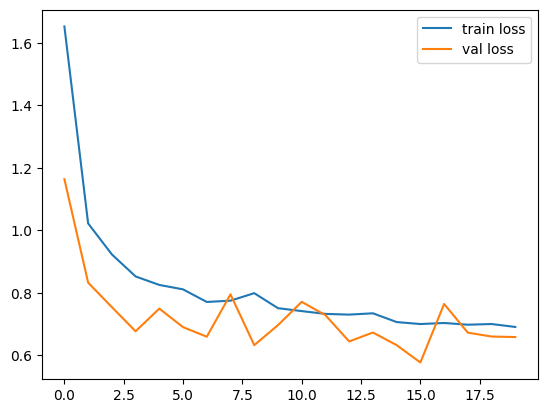

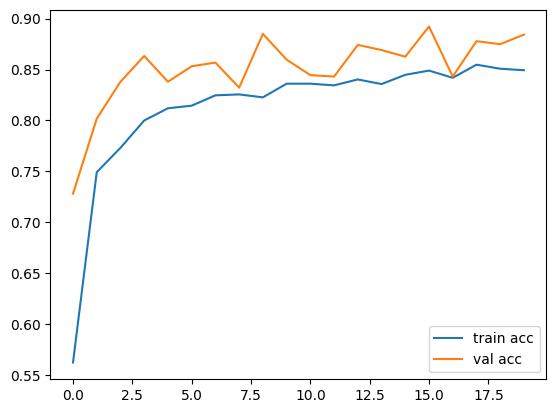

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()